<a href="https://colab.research.google.com/github/TaeYongGong/class2021Spring/blob/main/sound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
1

1

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import IPython.display as ipd
import numpy as np
from scipy.signal import lfilter
# dir(ipd)
# dir(lfilter)

# **수학개념**

## **복소수**
- $a$(실수)+$bi$(허수)
- 실수 x축과 허수 y축으로 되어있는 복소평면 위의 한점으로 나타낼 수 있음
### 기본성질
  - 복소수 덧셈은 **화살표 이어 붙이기**이다. 
    - 두개의 벡터값으로 생각하면 된다. 
  - 복소수 값에 $i$를 곱하면 복소평면 상에서 왼쪽으로  $90\,^{\circ}$  회전, $i^2$을 곱하면 왼쪽으로  $180\,^{\circ}$  회전
    - $ (a+bi)i = ai+-b $ 
      - 기울기 : $ \frac{b}{a} => -\frac{a}{b} $
      - 두 개의 곱은 '-1'이다.
    - $-i$는 오른쪽  $90\,^{\circ}$ , $(-i)^2\$은 오른쪽으로  $180\,^{\circ}$ 



## **미분방정식**
*기울기와 함수값이 같다*

$ f^{\prime}(x)=1*f(x)$


$ \begin{array}{l}
f(x+\Delta x)=(1+\Delta x) f(x) \\
f(\Delta x)=(1+\Delta x) \\
f(2 \Delta x)=(1+\Delta x)^{2} \\
f(3 \Delta x)=(1+\Delta x)^{3} \\
\vdots \\
f(n \Delta x)=(1+\Delta x) f((n-1) \Delta x)
=(1+\Delta x)^n
\end{array} $


*등비수열의 형태*

$ \begin{array}{l}
f(x)=\lim _{n \rightarrow \infty}\left(1+\frac{x}{n}\right)^{n} = e^x\\
f(1)=\lim _{n \rightarrow \infty}\left(1+\frac{1}{n}\right)^{n} = 2.718... = e
\end{array} $ 

$f^{\prime}(x)=1*f(x) = e^x$


## **자연상수**
위에서 유도된 상수
-  $\lim_{dt\to0} \frac {e^{dt} - 1}{dt} = 1$을 만족하는 수 
- 비례상수(증가율)가 1인 밑 -> 미분방정식이 자신인 함수
- $e = lim_{n\to\infty}(1+ \frac {1}{n})^n
= lim_{n\to0}(1+ x)^\frac {1}{x}$
- 따라서 $e^{i} = lim_{n\to\infty}(1+ \frac {i}{n})^n$
  - cf) 자연로그는 $e^{ln(n)} = n$(n이 자연수일때)

이는 그래프 상으로 지수함수의 형태가 된다. 

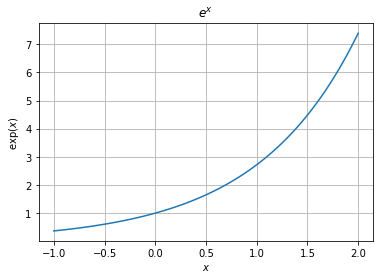

In [ ]:
x = np.linspace(-1, 2, 100)
y = np.exp(x)

plt.plot(x, y)
plt.title('$e^x$')
plt.xlabel('$x$')
plt.ylabel('$\exp(x)$')
plt.grid(True)
plt.show()

## **$e^{\pi\ i } + 1 = 0$** 유도


$f^{\prime}(x)=i \times f(x)$

$e^{i x}=\lim _{n \rightarrow \infty}\left(1+\frac{i x}{n}\right)^{n}$

if $ x = 1 $

$e^i = \lim _{n \rightarrow \infty}\left(1+\frac{i}{n}\right)^{n} $


**$ e^i = a + bi$**이다.

따라서, 위 두 식을 통해서 x좌표에 따라 ploting되는 2개의 실수축과 하나의 허수축으로 이루어진 3차원 그래프를 생각해 볼 수 있다. 

이를 3차원 그래프상에서 생각해보면 

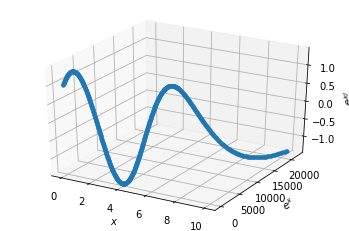

In [ ]:
x = np.linspace(0,100,10000)
y = [np.exp(b) for b in x]
z = [np.exp(b*1j).real + np.exp(b*1j).imag for b in x]

fig = plt.figure()
ax = plt.subplot(111, projection='3d')
ax.plot(x[0:1000], y[0:1000], z[0:1000], '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$ e^x $')
ax.set_zlabel('$e^{xi} $')
ax.grid()

또한, 이를 복소평면상에서 보면

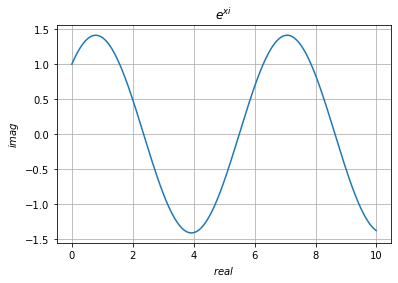

In [ ]:
plt.plot(x[0:1000], z[0:1000])
plt.title('$e^{xi}$')
plt.xlabel('$real$')
plt.ylabel('$imag$')
plt.grid(True)
plt.show()

이 그래프가 어떻게 도출되는 지 미분방정식을 이용하여 살펴보면 

새로운 미분 방정식 : 

$ f(x+\Delta x)=f(x)+i f(x) \Delta x $ 

$ f^{\prime}(x) = i f(x) $

여기에 $ f(x) = e^{ix} $을 대입하면
$ f(x+\Delta x)= e^{ix} +i e^{ix} \Delta x $

$ e^{i(x+\Delta x)}=e^{i x}+i e^{i x} \Delta x $ 


이를 복소수의 기본성질을 통해 이해한다면

위의 식은 복소평면상 $e^{ix}$ 벡터와 $ie^{ix} \Delta x $의 합으로 볼 수 있다.

임의의 복소수에 어떤 실수를 곱해주는 것은 그 복소수가 그 방향 그대로 늘어나거나 줄어드는 것을 의미하는데 
$ e^{i x} \Delta x $는 $e^{ix}$ 벡터가 방향은 유지한채 $ \Delta x$ 만큼 줄어드는 것을 뜻한다. 

이에 허수 $i$를 곱하면 크기는 그대로 유지한채 방향만 $90\,^{\circ}$ 방향으로 돌아간다. 

이를 e^{i x} 벡터에 더해주면 기본성질에 의해 복소평면상에서 화살표 이어주기가 된다. 


 




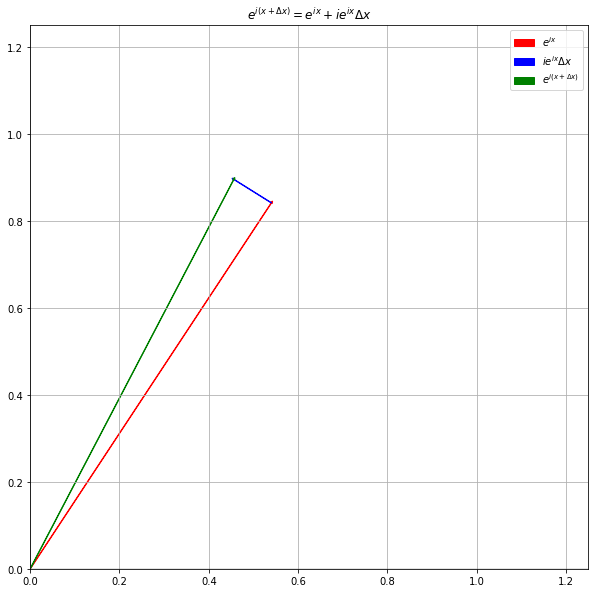

In [ ]:
a = np.exp(1*1j)
b = 1j*np.exp(1*1j)*0.1
c = a+b
plt.figure(figsize=(10,10))
plt.xlim(0,1.25)
plt.ylim(0,1.25)

a1 = plt.arrow(0, 0, a.real, a.imag, head_width = .005, head_length = .005, color = 'red',label="$e^{i x}$")
a2 = plt.arrow(a.real, a.imag, b.real, b.imag, head_width = .005, head_length = .005, color = 'blue',label="$i e^{i x} \Delta x $")
a3 = plt.arrow(0, 0, c.real, c.imag, head_width = .005, head_length = .005, color = 'green',label="$ e^{i(x+\Delta x)}$")

plt.axhline(0, color='gray', alpha = 0.3)
plt.axvline(0, color='gray', alpha = 0.3)
plt.title("$ e^{i(x+\Delta x)}=e^{i x}+i e^{i x} \Delta x $")
plt.legend([a1,a2,a3,],["$e^{i x}$","$i e^{i x} \Delta x $","$ e^{i(x+\Delta x)}$",])
plt.grid()
plt.show()

대략 표현해주면 $ e^{i(x+\Delta x)}$ 라는 벡터와 그 아래에 $e^{i x}$ 라는 벡터가 있는 데 그 사이에 $i e^{i x} \Delta x$ 벡터가 존재하고 이는 직삼각형을 이룬다.

그리고 $\Delta x$의 값이 한없이 작아진다고 할때 두 벡터는 구분할 수 없게된다.

$x=0$일때 

$i = 1$ 복소평면상 원점에서부터 1만큼 떨어져 있기때문에 

$e^{i(\Delta x)}=1+i \Delta x(=\Delta x)$

그리고 $\Delta x$는 0에 한없이 가까워지기 때문에

결국

$e^{i(\Delta x)} = 1$이 된다. 


$ x = \Delta x$ 일때 

$ e^{i 2 \Delta x}=e^{i \Delta x}+i e^{i \Delta x} \Delta x$

이를 보면 $x$가 $\Delta x$ 만큼 커지면 복소수는 원래방향에서 수직으로 꺽어 $\Delta x$ 만큼 간곳에 위치하게 된다. 



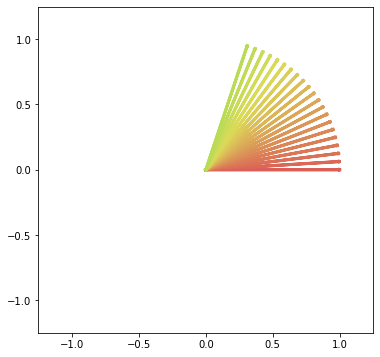

In [ ]:
import numpy as np
import pylab as plt
import itertools
import seaborn as sns

n = 100
colors = sns.color_palette("hls", n)
roots = np.roots( [1,] + [0,]*(n-1) + [-1,] )

idx = np.argsort([np.angle(x) for x in roots])
roots = roots[idx]

plt.figure(figsize=(6,6))

for root,c in zip(roots[49:70],colors):
    plt.arrow(0,0,root.real,root.imag,ec=c,lw=3)

plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
plt.show()

따라서, n번이동하면  $ e^{i n \Delta x}$에 위치하게되고 이 값은 $n \Delta x$ 형성한 곡선의 길이를 뜻한다. 



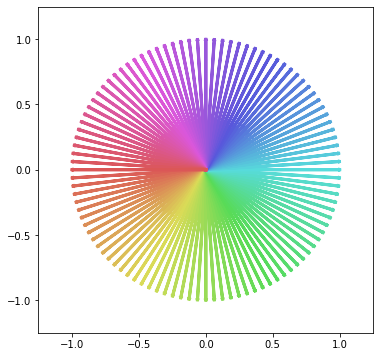

In [ ]:
import numpy as np
import pylab as plt
import itertools
import seaborn as sns

n = 100
colors = sns.color_palette("hls", n)
roots = np.roots( [1,] + [0,]*(n-1) + [-1,] )

idx = np.argsort([np.angle(x) for x in roots])
roots = roots[idx]

plt.figure(figsize=(6,6))

for root,c in zip(roots,colors):
    plt.arrow(0,0,root.real,root.imag,ec=c,lw=3)

plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
plt.show()

이를 $x$라는 하나의 문자로 둔다면 $e^{ix}$는 곡선을 형성하면서 움직이는 복소평면상의 점이되고 이 곡선은 $r = 1$인 원의 일부이다. 

즉, 복소평면상 단위원의 일부이다.

왜나면 $\Delta x$만큼 떨어진 선분을 연장한 것이 그 지점에서의 접선이고 $e^{ix}$는 $\Delta x$만큼 이동할때마다 허수 $i$를 곱해줌으로서 반비름과 접선의 각도 항상 수직으로 맞춰주고 있던 것이다. 

이러한 특성을 가진 도형이 원이고 결국 $e^{ix}$는 복소평면상 단위원을 그리는 함수가 되는 것이다. 

또한 $e^{ix}$에서 $x(=n \Delta x)$가 나타내었던 길이는 반지름이 1인 원의 길이이자 실수축과 이루는 각도이다. 

따라서, $x = \pi$일때의 위치는 실수 1일때와는 정반대편의 $-1+0i$이고 이를 통해 $e^{i\pi} = -1$을 증명할 수 있다. 

## **오일러 공식**
$e^{i\theta} = \cos\theta + \sin\theta\ i$
- 복소수 형태
- $e$ 자연상수, $i$ 허수, $cos$, $sin$으로 이뤄져 있음 
- $cos$을 x축으로 $sin$을 y축으로 해서 그래프로 표현가능
- **두 실수 축에 존재하던 단위원을 실수와 허수축으로 이뤄진 복소평면에서 그려 단위원의 삼각매개화를 보여주는 공식이다** 
--- 
### 단위원 
단위원 위의 임의의 점 P를 극좌표를 이용하여 나타내는 경우, $(r,\theta )=(1,\theta )$ 

($\theta$ : 점 P와 원점을 이은 반직선 OP와 x축이 이루는 각, ${\displaystyle 0} ≤\theta  ≤ 2\pi$)으로 나타낼 수 있다. 

또한 이 점을 직교좌표를 이용하여 표현하는 경우, 이 점의 좌표는 (x,y)로 나타낼 수 있다.


점 P에 의해 만들어지는 직각삼각형에 대해, 삼각함수 중 사인 함수와 코사인 함수의 정의를 적용하면 


$sin\theta = \frac{y}{r}, cos\theta =\frac{x}{r}$으로 나타낼 수 있다.

단위원의 경우, 원점으로부터의 거리 $r=1$이므로 ${\displaystyle y=sin\theta ,x=cos\theta }$로 정리할 수 있다.

이와 같은 방식으로 삼각함수의 정의를 이용하여 단위원 위의 모든 점을 '원점으로부터의 거리($r$)'와 '$x$축의 양의 방향과 이루는 각도$(\theta )$'로 나타내는 것을 **'단위원의 삼각매개화'**라 한다.







### 추가설명
- 복소평면상에서 $(0,0*i)$에서 $a+bi$까지 길이를 $l$라고 할때 이에 대한 Exponential은 $l$은 유지한채로 $theta$값만 비례적으로 바뀐 점으로 이동한다. 

- so, $e^{\theta\ i}$에서 $l$의 값을 1로하고 $\theta\$값만 바꿔주면 복소평면상에서 단위원이 그려진다.

- $e^{i}$의 값을 복소평면상에 그린다고 생각해본다면
이는 n이 커질 수록 $e^{i}$는 반지름이 1이고 길이가 1인 호 위의 점이 그려진다. 

- 여기에 $\theta$ 값을 추가해주면 

- **결국 $e^{i\theta}$ 반지름이 1이고 각도가  $ \theta $ (rad)인 호 위의 점을 의미하게 되며  이를 복소평면상의 단위원을 그린다고 생각하면  $\cos\theta + \sin\theta i$라는 공식을 유도할 수 있다.**

--- 
따라서, 실수축 단위원(원점으로부터의 거리 $r=1$, ${\displaystyle y=sin\theta ,x=cos\theta }$)을 복소평면상에서는 허수축에서는 $y \times i=sin\theta \times i$를 실수축에서는 $x = cos\theta$으로 삼각매개화를 해줄 수 있다. 

이는 3차원 $x,y,z$축에서는 $x=x,\ y = cos\theta,\  z \times i=sin\theta \times i$가 되는 것이다.

# Phasor

In [ ]:
# parameter setting
# -> 값만 다르게 바인딩하면 결과값(소리)가 달라진다. 
amp = 1         # range [0.0, 1.0] -> 소리의 크기 
sr = 10000       # sampling rate, Hz -> 얼마만큼 discrete하게 분석할 것인가?/1초에 어느정도의 정보를 담을 것인가?
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz -> 1초에 반복이 몇번되는가?,소리의 높낮이

## **parameter setting**
----
- **amp**  -> 소리의 크기 
- **sr** -> sampling rate, Hz -> 얼마만큼 discrete하게 분석할 것인가?/1초에 어느정도의 정보를 담을 것인가?
- **dur**  -> duration, in seconds
- **freq** = 100.0 -> sine frequency, Hz -> 1초에 반복이 몇번되는가?,소리의 높낮이




## **sin(__) and time**
---
__ = 각도값 in radian 

이 값을 **theta(각도값)**라고 정의함. 
하지만, **sin graph**에는 **시간**개념이 빠져있다. 

시간이 없으면 소리의 실체값을 만들 어 줄 수 없다. 

시간이라는 개념을 만들어주기 위해서 
**각도값인 phase와 time을 synchronize해야한다.**

## **generate time**
**time = np.arange(1, $sr \times\ dur +1$)/sr**

1차원의  행렬, 시간의 리스트 

- sr
- dur 
- (+1) sampling rate와 일치

Sampling rate만큼의 time tik(구간)을 만들어 준다. 


ex) if sr = 10000hz, dur =1

then, t = [$1/10000, 2/10000, 3/10000,
......1$]

if sr = 10000hz, dur = 0.5

then, t = [$1/10000, 2/10000, 3/10000,
......0.5$]


In [ ]:
# generate time
t = np.arange(1, sr * dur+1)/sr

## **generate phase**
- $theta = t \times\ 2 \times\ np.pi \times\ freq$

각도값을 time과 연동 시켜서 phasor로 바꿔줘야한다.

theta =

- **t** -> 시간의 행렬 (벡터)
- **$2 \times\ np.pi$** = 2𝝅r = 360도 -> **하나의 주기***
    - **np.pi** = 1𝝅<90도>
    - ***x축**의 값이다.
- **freq** = 몇 바퀴를 만드느냐?

    -> **주기를 설정**

**결론**

**각도값인 phase와 time을 synchronize됨**

- **$2 \times\ np.pi\times\ freq$** 은 360도로 회전하는 것을 frequency만큼 반복하고 <**사인그래프를 frequency만큼** >
- 여기다가 **$\times\ t$**를 해서 시간의 개념을 추가 **<구간을 나워주는 것>**
- 그것을 **dur**동안 **(2np.pi*freq읠 sin graph를 sampling rate만큼의 구간으로 나눈 뒤 dur만큼)**
- 결국에는 즉, **theta가 phase가 된다. -> 이는 phasor로 만들어 줄 수 있음**
- *t는 arange이고 나머지는 곱하는 상수( time의 벡터의 사이즈와 theta의 벡터의 사이즈는 같다. )*

In [ ]:
# generate phase
theta = t * 2*np.pi * freq   

## **generate signal by cosine-phasor**
**s = np.sin(theta)**
- 시간이라는 개념이 반영된 theta값을 변수로하는 sin-graph

s = $amp \times\ np.sin(theta)$
- **amp= y축의 크기를 늘려줌**
- 진폭이 2로 늘어남( -1*x / 1*x로 x축을 기준으로 대칭적으로 커짐)

In [ ]:
# generate signal by cosine-phasor
s = amp*np.sin(theta)

## **graph**
**fig = plt.figure()** 

- fig라는 function을 정의

**ax = fig.add_subplot(111)** 

- ax = fig.add_subplot(221) → 2*2로 화면을 분리<4개의 화면을 출력>를 하고 그 중 첫번쨰 것을 선택
- ax = fig.add_subplot(222) → 2*2로 화면 분리 / 2번째 선택
- fig.add_subplot(111) → 1*1로 화면 분리/ 1번째 선택

**ax.plot(t[0:1000], s[0:1000], '.')**
- sin 그래프 형태
- x축은 time
- s는 sin이라는 function에서 나온 결과값 → y축
- []은 일부만 -> singraph을 한 눈에 보기 편하게 
- .은 그래프의 형태('.' or '-' 의형태)


Text(0, 0.5, 'real')

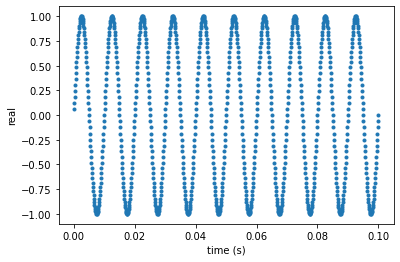

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.plot(theta, s, '.')
ax.plot(t[0:1000], s[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

In [ ]:
ipd.Audio(s, rate=sr)
# 소리를 들려주는 함수<audio라는 function을 가져온다.>
# 소리로 만들어 주고 싶은 그래프<c or s 등>과sampling rate이 필


## **generate signal by complex-phasor**
### **c = np.exp(theta*j)**

**theta** ($\theta):np.pi\times\ k$
- k가 2면 sin graph에서 하나의 주기 = $2\pi\$
  
  - = np.sin($2\pi\$) 

- 우선 여기에 몇 번 반복할지를 설정 = **freq**
  - 이것이 **pitch**이다.

- 여기에 **시간을 동기화**
  - sin graph을 점으로 discrete하게 나누는 것 
  - 이 점 하나가 하나의 시간을 반영한다. = **array t**에서는 원소 중 하나
    - sampling frequency = 1000이면 점 하나는 $\frac{1}{1000}$의 시간을 뜻한다. 
    - **array t**에서는 시간이 지나가는 것을 $\frac{x}{1000}$에서 $x$값이 증가하는 것으로 변환

**k = 2 x time array 가 되고  $theta$는 시간의 개념이 들어있는 $radian$값이 된다**

### **np.exp(theta * j)** 
- np.exp(x)함수 = 밑이 $e$인 $y=e^x$으로 변환
- 여기서 j는 허수 $i$다 
  - theta만 입력을 들어간다.나머지는 고정
- 위의 공식을 적용하면 $\cos\theta + \sin\theta\ i$ 값들의 array로 구성된다. 


## graph 
- 시간의 개념이 들어있는 $rad$값 $theta$가 반영된 오일러 공식에서 **변수 $t$**값에 따라 달라지는 $e^{i\theta}$을 실수부분과 허수 부분으로 나눠 추출하면 **3차원 벡터**로 만들어 줄 수 있다.
- 이를 그래프로 표현하면 **x(time, from time array),y($\cos$ = c.real),z($\sin$, c.imag)축**으로 이뤄진 3차원의 그래프를 만들어줄 수 있다.
  - 좌표평면과 복소평면의 결합
- 이 모든 값은 theta값에 종속되어 있기 때문에 전부 -1에서 1사이의 값을 가진다. 

3d 그래프 분석

- time과 imag => sin graph
- time과 real -> cos graph
- real과 imag -> 복소평면상의 단위원 

In [ ]:
# generate signal by complex-phasor
c = amp*np.exp(theta*1j)
print(c)

[0.98228725+1.87381315e-01j 0.92977649+3.68124553e-01j
 0.84432793+5.35826795e-01j ... 0.92977649-3.68124553e-01j
 0.98228725-1.87381315e-01j 1.        -1.01900517e-13j]


Text(0.5, 0, 'imag')

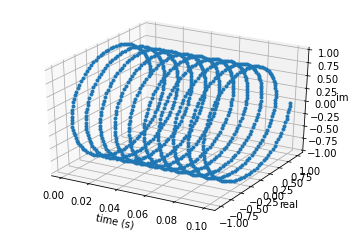

In [ ]:
fig = plt.figure()
ax = plt.subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [ ]:
import plotly.graph_objects as go
import numpy as np

x, y, z = t[0:200], c.real[0:200], c.imag[0:200]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=3))])
fig.update_layout(scene = dict(
                    xaxis_title='time (sec)',
                    yaxis_title='real',
                    zaxis_title='imag'))
fig.show()

In [ ]:
ipd.Audio(c.imag, rate=sr)

## phasor_sine
- 위의 과정을 한번에 함수를 통해 실행

In [ ]:
def phasor_sine(amp, sr, dur, freq):

  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq   
  s = amp*np.sin(theta)

  return s, t, theta

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 300
s, t, theta = phasor_sine(amp, sr, dur, freq)
ipd.Audio(s, rate=sr)

## phasor_complex
- 위의 과정을 한번에 함수를 통해 실행

In [ ]:
def phasor_complex(amp, sr, dur, freq):

  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq   
  c = amp*np.exp(theta*1j)
# 위에서 나눈 처리들을 하나의 function으로 통합해서 실행한다.

  return c, t, theta
# 밑에서는 complex number자체를 return해준다. 
# ipd.Audio에서는 c가 아니라 c.imag sin값, c.real cos값을 사용한다. 

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 300.0
c, t, theta = phasor_complex(amp, sr, dur, freq)
ipd.Audio(c.imag, rate=sr)

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 300.0
c, t, theta = phasor_complex(amp, sr, dur, freq)
ipd.Audio(c.real, rate=sr)

# **Generate pulse train(=source)**

In [ ]:
# parameter setting
amp = 1
sr = 10000
dur = 0.5

F0 = 100
Fend = int(sr/2)
# f0는 가장 낮은 frequency이다. 이에대한 harmonics을 만들어준다. 
# Fend -> 표현하는 제일 마지막 주파수.-> 5000까지가 우리가 표현할 수 있는 가청 주파수이다. 이는 float이기 때문에 range에서 쓰기위해서 int처리
# 이것을 Nyquist이라고 한다. 


- 위에서 sr/2를 한 이유가 뭘까?


- sampling rate이 100hz라고 생각해보자.

  - 1초에 포함되는 정보량이 100개다. -> 주어진 숫자가 100개다.

  - 이 100개의 숫자로 1hz의 주파수를 표현할 수 있나?

  - 이는 한번의 주기가 있으면 된다.

  - 10000개의 주기는 가능할까? 10000hz은 표현할 수 있을까? 불가능하다

    - **sampling rate이 1초에 충분히 있어야지 그만큼의 정보를 표현할 수 있음**

  - 10000번을 표현하려면 하나의 숫자로 100개의 주기를 표현해야하는데 이는 불가능하다.

- **주어진 주파수(정보량 / sr)로는 주파수(표현하고 싶은 주기의 양 / frequency)을 반만 표현가능하다.**

  - why? 하나의 주기는 최소 두개의 정보량을 필요로 한다.<+축에 하나를 필요로 하고 -축에 하나를 필요로 한다.>

  - 이를 **nyquist frequency**라고 한다.

cf) cd음질은 44100hz을 sr로 했느냐? -> 사람이 들을 수 있는 가청 주파수가 20000이기 때문이다. -> 그래서 cd음질이 441000hz로 고정됨

사람의 말소리는 4000hz안에서 무슨 말인지는 구별가능 but, 누구인지 구별이 불가능<ex) 옛날 유선전화의 sr = 8000hz>

그래서 우리도 f3(4000hz)까지만 분석하면 무슨 소리인지 판단가능하다. <모음 같은 
경우에는 f2까지만 파악>

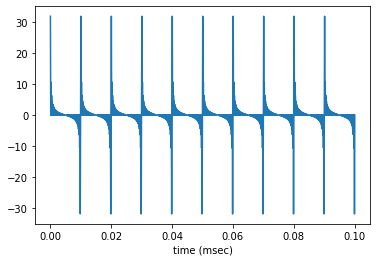

In [ ]:
s_all = 0
# 여기서 s값은 가장 초기의 s값이다.-> 그냥 s값을 0으로 정해주는 함수 -> 어차피 s_all은 np.array가된다.
for freq in range(F0, Fend+1, F0):
  # F0부터 Fend까지 F0의 harmonics(F0의 배음)들로 이뤄진 range 
  s, t, theta = phasor_sine(amp, sr, dur, freq)
  #   s = amp*np.sin(theta) 
  s_all += s
  # s_all는 s값(np.array임으로 s_all도 np.array이다.)을 전부 다 더해서 만들어 지는 np.array, 전부다 더해서 pulse train처럼 나온다
  # freq에 따라 s값(시간이랑 synchronized된 sin graph)을 계속해서 없데이트

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s_all[0:1000]); 
ax.set_xlabel('time (msec)')
# ax.set_xlabel('theta')
ipd.Audio(s_all, rate=sr)
#display라는 library에서 audio라는 함수를 가져온다
# 소리를 들려주는 함수<audio라는 function을 가져온다.>
# 소리로 만들어 주고 싶은 그래프<c or s 등>과sampling rate이 필요

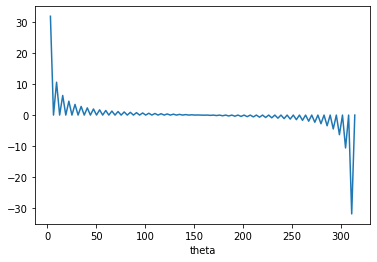

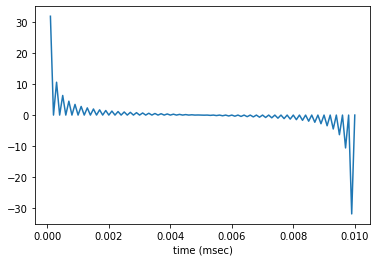

s_all는 s를 전부 다 더해서 만들어 지는 행렬 전부다 더해서 pulse train처럼 나온다
(s의 행렬 -> 이 행렬은 f0일때 부터, f49일때 까지의 tmp 행렬이 전부 합친 행렬 / 1차원 벡터이다.)

- x축 -> time / y축 -> s값들(배음 구조의 frequency(주기를 갖는) 시간별 sin값들의 총합으로 이뤄진 np.array)

- 여기서는 F0 = 100, sr/2 = 5000이기때문에 위의 패턴(반복)이 총 50번 나온다. 

- 시간으로 보면 0.01초마다 한번씩 반복한다(dur / 50)

- wave form(y축이 amplitude)으로 볼 수 있지만 frequency(y축이 frequency / 스펙토그램)를 기준으로 볼 수 있다.

- 위의 wave form에서 한 슬라이스를 잘라서 x축을 주파수 y축을 진폭으로 정할때 -> spectrum(f0 = 100hz ..... f49 = 5000hz)이 만들어진다.

이것을 늘려서 보면 formant가 어느 frequency가 되느냐에 따라 f1, f2가 달라진다. -> 왜냐하면 소리가 나오면서 하나의 틀로 압축이 되는데 - 이를 보면 peak가 달라지기 때문이다.

이를 만들려면 우선
1. f0부터 시작해서 f49까지 gradually decreasing하는 모양을 만들어 준다.
2. peak를 하나 만들고
3. peak를 계속 하나하나식 만들어서 적용해줄 것

벡터는 정보이자 데이터이다. 

다시말하자면, 벡터는 숫자 자료의 나열이다. 

벡터 ↔ 한쌍의 숫자 

모든 것은 데이터로 되어있다.  아날로그 데이터는 디지털 데이터로 표현 가능하다. 

따라서, 모든 것은 벡터값으로 표현할 수 있다.

벡터 공간, 벡터, 선형 변환, 행렬, 연립 선형 방정식 등을 연구하는 대수학의 한 분야가 바로 선형대수이다. 

Matrix > Vector(가로, 세로 축 중 하나) > Scalar(숫자 하나)

# 행렬

![](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/image1.jpeg?raw=true)

행렬은 정의상 사각형 형태로 되어있음

## Column과 Row

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/32ef175f-7bed-4b21-bcc6-b45ea3cdaa35/image2.png](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/image2.png?raw=true)

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/e1172508-1a20-4be0-8ebe-37e21f17a2cb/image3.png](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/image3.png?raw=true)

가로는 column이라고 부르고 세로는 row이라고 부른다.

## 행렬의 차원과 공간

행렬의 크기를 얘기할 때 dimension(차원)으로 전환되고 이는 행렬의 공간과 동일하다. 

행렬은 벡터로 나눌 수 있고 벡터 공간는 m*n 의 형태 벡터들이 될 수 있는 모든 값으로 이뤄져 있는 공간(= 차원 / N개의 componant가 그 차 원을 다 채우면 그 차원의 vector space 하나를 이룸.)

**whole space** 

벡터 자체가 가 지고 있는 차원 전체

**column/row space** 

column 혹은 row가 채울 수 있는 차원 전체

이것이 바로 column 측면에서 는 m차원 row 측면에서는 n차원이 된다.

 하나의 행렬은 m이라는 차원과 n이라는 차원을 whole space로 가진다.

**null space** 

 whole space에서 어떤 column/row space를 정의하고 나서 그 나머지(기하학적 정의)

어떤 행렬이 있을 때 무엇을 곱하든 0으로 이루어진 행렬이 될 때, 이 모든 값들이 이루는 공간

cf) column서는 왼쪽에다 곱해야지 차원이 같아지기 때문에 left null space라고 한다. Row의 입장 에서는 오른쪽에서 곱해야지 차원이 같아지기 때문에 null space라고 한다. 그리고 하나의 행렬에 서 column입장에서 null space를 빼고 row입장에서 null space를 빼면 둘다 같은 차원을 가진다. 즉, whole space는 달라도 둘의 차원은 같다는 뜻이다.

## 행렬과 벡터

이 하나의 column 혹은 row를 벡터로 표현가능

### 기하학적 정의

벡터는 벡터의 차원 공간에 한 점으로 나타낼 수 있음. 

벡터는 공간상의 한 화살표이다. 

길이와 방향을 가지고 있고 차원을 가지고 있음.

2차원이라는 말은 숫자가 두줄로 배열됐음을 의미한다. 

백터의 좌표는 한쌍의 숫자

좌표상에 표현하면  머리가 꼬리(원점)으로 부터 얼마나 떨어져 있는냐를 나타냄. 

(굳이 원점에서 시작할 필요는 없지만 편의상 원점에서 부터 시작한다고 가정함.)

$\begin{bmatrix} x \\ y\end{bmatrix}$에서 x는 x축으로부터 얼마나, y는 y축으로 부터 얼마나 떨어져 있는 지를 나타냄.

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/0bd7ffaa-9f25-4950-a456-78efd9428c98/Untitled.png](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/Untitled.png?raw=true)

2차원, 2차원 상의 한점

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/9673a1d2-761d-4b9b-98b9-95b15fb546ff/Untitled.png](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/Untitled%201.png?raw=true)

3차원, 3차원 상의 한점

벡터는 크기와 방향성만 중요함

크기와 방향성만 정해지면 어디로 가든지 상관이 없음. (원점에서 시작할 필요가 없음)

# 벡터의 계산

**상수곱**

상수와의 곱셈은 벡터의 길이를 변형시킴. 이를 scaling이라고도 함. 

벡터를 scaling하는 상수를 scalar라고 부른다. 

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/5c856d23-0cce-4aad-a3cb-b53a36d32ffb/Untitled.png](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/Untitled%202.png?raw=true)

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/98c1194b-6344-4ac0-afb4-6927bf74c72a/Untitled.png](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/Untitled%203.png?raw=true)

벡터에 곱해진 값(상수)은 벡터의 길이에만 영향을 주 크기에 영향을 주지 않음.

상수값을 통해 확장하면 vector space을 이루게 된다.

음의 상수를 곱하면 벡터가 뒤집힌 상태가 된다. 

**벡터의 덧셈**

두 벡터의 덧셈은 (평행사변형 형태로) 새로운 방향으로 바꿔줌. 

다른 말로 하자면 두 벡터 중 하나의 시작을 원점이 아닌 다른 벡터의 머리에서 시작하게 이동시키고 도출된 머리가 두 벡터를 더한 꼬리가 원점인 새로운 벡터의 머리가 된다

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/578e4c96-febe-473d-83b7-a7399ecbe7ef/Untitled.png](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/Untitled%204.png?raw=true)

vector space을 확장하지는 않는다. 

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/86fa1eb5-82b7-4c12-ae13-a3085870a683/Untitled.png](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/Untitled%205.png?raw=true)

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/db25d58d-4f19-4545-84a7-eeda5bd628f3/Untitled.png](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/Untitled%206.png?raw=true)

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/8c254478-655d-4453-b63e-6f5c3614f412/Untitled.png](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/Untitled%207.png?raw=true)

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/8c254478-655d-4453-b63e-6f5c3614f412/Untitled.png](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/Untitled%208.png?raw=true)

## **벡터 product**

product의 종류는 세 가지

- inner product 내적
- outer product 외적
- tensor product 텐서곱

### inner product 내적

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/277ba6a7-35f0-421b-95d7-ba33fc25ddc2/Untitled.png](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/Untitled%209.png?raw=true)

### **기하학적 정의**

 $|a|\cos{\theta}$에서 $|a|$는 벡터 a의 크기를 나타내며 이에 $\cos{\theta}$을 곱하는 것은 벡터 a의 방향을 b의 방향으로 변형시키는 것이고(이를 다른말로 **project on to**이라고 한다.) $|a||b|\cos{\theta}$은 결국  벡터 a와 크기가 동일하면서 벡터 b와 동일한 방향인 새로운 벡터를 벡터 b에 곱하는 것과 동일하다. 

반대도 경우도 동일한 값이 도출된다. 

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/367bc269-0a24-4165-8fa0-821d490c24e1/Untitled.png](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/Untitled%2010.png?raw=true)

결과적으로 두개의 2d input을 통해 하나의 1d output이 도출된다. 

기저벡터의 차원에서 설명한다면 

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/62b7ae27-f4bb-4ae6-884f-c9a8091ec055/Untitled.png](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/Untitled%2011.png?raw=true)

두 벡터 중 하나를 기저벡터 분해한뒤 이를 기저벡터로 갖는 동일차원의 공간에서 남은 벡터의 크기를 계산한 결과가 inner product인 것이다. 

위의 계산과 반대로 해도 대칭이기 때문에 동일한 결과값이 도출된다. 

### **대수적 정의**

$$\begin{bmatrix} a \\ c \\e \\.\\.\\.\end{bmatrix} \cdot \begin{bmatrix} b \\ d \\ f \\.\\.\\.\end{bmatrix} = a*b + c*d + e*f + ....$$

matrix-vector product와 dot product은 동일하다. 

matrix-vector product

$$\begin{bmatrix} nx & ny \end{bmatrix} \cdot \begin{bmatrix} x \\ y \end{bmatrix} =nx*x + ny*y$$

dot product

$$\begin{bmatrix} nx \\ ny \end{bmatrix} \cdot \begin{bmatrix} x \\ y \end{bmatrix} =nx*x + ny*y$$

행렬로 치면 하나의 행렬을 tilt해서 곱하는 것과 동일하다.

### Informational Similarity

이를 구하는 이유는 두 벡터(두 정보의 나열)간의 informational similarity를 구하기 위해서이다. 

1. $\cos{\theta}$를 통해(=cosine similarity)
    - $\cos{\theta}$는 두 정보 나열간 얼마나 떨어져 있는 지를 나타내는 지표이다.
    - $|a|와 |b|를 \ 알고 \ 있고 \ 대수적 \ 정의를 통해 \ inner \ product\ 값을 \ 도출할 \ 수 \ 있기 \ 때문에$  우리는 $\cos{\theta}$의 값을 도출할 수 있게 된다.

    ![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/50a9ae35-4858-4763-97a0-4df239e539fc/Untitled.png](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/Untitled%2012.png?raw=true)

    - $\cos(0) = 1\\ \cos(\pi / 2) = 0$  = orthogonal 두 벡터간 관련이 없다.

2. $a-b \ distance$을 통해 

- 거리를 구하는 공식: **유클리디안 공식**

    두 개의 벡터 각각 x component와 y component을 가지고 있으며 이 둘간의 거리는 좌표축 상에서 

    ![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/73bcc34f-4bfe-465f-a4e6-84393b1a0ca0/Untitled.png](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/Untitled%2013.png?raw=true)

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/a8cb75e8-9b3a-464f-9a0e-2df483a45221/Untitled.png](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/Untitled%2014.png?raw=true)

로 구할수 있다. 

다차원의 경우 

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/67845d3f-1e0d-4dc1-af86-c27e88f17ea6/Untitled.png](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/Untitled%2015.png?raw=true)

선형변환 : 변환의 적용은 벡터의 내적을 구하는 것과 같다. 

두개의 벡터값은 결합이 가능한데 이를 linear combination이라고 하고 이는 선형성(같은 직선위 에 존재하는 여부 / 독립성 여부)를 판단하는 기준이 된다.

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/80d644ea-948e-4420-88ad-ffbd540f6c58/image4.jpeg](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/image4.jpeg?raw=true)

# correlation and vector

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/db9f4b06-451d-4252-9c37-9e0bb3b0bd79/Untitled.png](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/Untitled%2016.png?raw=true)

### 기본개념

상관관계(correlation) : 같이 가는 느낌 -> correlation r의 값 : -1<=r=<1

- 1와 1의 값이 나올려면 선상에 있으면 된다. -> 얼마나 선상에 가까우냐에 따라 –1,1 / 상관 이 없을 때 -> r의 값이 0
- 0보다 작으면 negative corr, 1보다 크면 positive corr

correlation과 cosine similarity와 직접적으로 연관되어 있다. 

> 벡터의 내적 (inner product)과 상관계수

- 여러 개의 수치가 있어도 두 변수만 있다면 이 모든 수치는 두 개의 벡터로 표현할 수 있고 이 두 벡터는 차원이 넓다고 해도 삼각형 형태를 벗어 나지는 않는다.
- cos을 적용 가능
    - ex) $a = [1,2,3], b = [2,4,7]$

        T -> 행과 열을 바꿔 준다., 행렬식의 연산을 보여주기 위해(dot product을 적용하는 것과  동일) 

        $a*b^T$ 

        $a⋅b(∑ai*bi)$로도 표현가능 

        cf) $a^T*b$  행렬로 나오게 하는 방법 -> outer product

        b벡터의 선(길이)에 project된 a벡터의 값(길이)를 곱하면 내적 값이 나온다. 이를 알려면 $a⋅b = |a|*\cos(\theta)*|b|$를 구하면 된다.

    결국  $a⋅b(inner\ product)/|a||b|=cos(θ)=r($상관계수식으로 증명) -> 두 변수의 공분산 -> 벡터의 내적 / 두 변수 각각의 표준편차의 곱-> 각각 벡터 길이의 곱 $−1≤ cos(θ) = r ≤1(cos\ similarity)$\ -> 두 개의 벡터를 주고 이를 구해라 -> 얼마나 비슷한지를 구하는 법

### 통계학적 공분산과 상관계수

> 공분산(Covariance)

두 확률변수 X와 Y가 어떤 모양으로 퍼져있는지

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/23d335f6-26fc-48db-84b9-0f9c5f11d70d/image14.png](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/image14.png?raw=true)

즉, X가 커지면 Y도 커지거나 혹은 작아지거나 아니면 별 상관 없거나 등을 나타내어 주는 것 이다.

- Cov(X, Y) > 0
    - X가 증가 할 때 Y도 증가한다.
- Cov(X, Y) < 0
    - X가 증가 할 때 Y는 감소한다.
- Cov(X, Y) = 0
    - 공분산이 0이라면 두 변수간에는 아무런 선형관계가 없으며 두 변수는 서로 독립적인 관계에 있음을 알 수 있다.

그러나 두 변수가 독립적이라면 공분산은 0이 되지만, 공분산이 0이라고 해서 항상 독립적이 라고 할 수 없다.

어떻게 하면 그것을 나타낼 수 있을까 고민한 결과 공분산은 아래와 같이 구하기로 하였다.

- 확률변수 X의 평균(기대값), Y의 평균을 각각(설정) 이라 했을 때, X,Y의 공분산은 아래와 같다.

    ![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/106a5e13-6954-49f3-8270-b3b6a82940ee/image15.jpeg](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/image15.jpeg?raw=true)

- 공분산 : X의 편차와 Y의 편차를 곱한것의 평균이라는 뜻

    ![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/a3f78eb5-9bf2-42a1-adae-9889950dfaae/image16.jpeg](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/image16.jpeg?raw=true)

    ![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/36820b60-e280-4c4c-97f7-0ef3201f2f7b/image17.jpeg](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/image17.jpeg?raw=true)

    ![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/e9ecf81f-20e4-4340-9f15-2e4b1d71b004/image21.jpeg](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/image21.jpeg?raw=true)

- X와 Y가 독립이면이므로 공분산은 0
    - **공분산에도 문제점이 하나** 있음. **.X와 Y의 단위의 크기에 영향을 받는다는** 것이다.

        즉 다시말해 100점만점인 두과목의 점수 공분산은 별로 상관성이 부족하지만 100점만점이기 때문에 큰 값이 나오고 10점짜리 두과목의 점수 공분산은 상관성이 아주 높을지만 10점 만점이기 때문에 작은값이 나온다.

> **상관계수**

- 이것을 보완하기 위해 **상관계수(Correlation)가 나타난다**. 상관계수라는 개념이 왜 나왔는지 생각하다 보면 의외로 간단하다. **확률변수의 절대적 크기에 영향을 받지 않도록 단위화 시켰다고 생각하면 된다**. 즉, **분산의 크기만큼 나누었다고 생각하면 된다.**

**상관계수의 공식**

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/0355af66-24fa-427e-960d-c58d5420a5c1/image22.jpeg](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/image22.jpeg?raw=true)

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/3e92304c-1a84-4c0b-a9a9-8e4c1fc9b0dd/image23.jpeg](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/image23.jpeg?raw=true)

**상관계수의 성질**

1. **상관계수의 절대값은 1을 넘을 수 없다.**
2. 확률변수 X, Y가 독립이라면 상관계수는 0이다.
3. **X와 Y가 선형적 관계라면 상관계수는 1 혹은 –1이다.**

> 상관관계에서 선형대수가 쓰이는 방법

차원이 높아져도 삼각형을 이룬다. 여러 개의 벡터값이 직선을 이룬다.

선형결합 vector의 개수는 변수의 개수지 변수 값의 개수가 아니게 된다.

**하나의 변수는 하나의 vector로 모든 변수값을 나타낼 수 있다.** 

**각도 값(θ)에 cos(θ)을 해주면 r 값이 된다.**

**관련성이 없을수록 각도값이 커진다(최대 90도) -> cor값은 0**

**관련성이 있을수록 각도값이 작아진다.(최소 0도) -. cor값은 1** 

 **90도 초과해서는 –1에 가까 워 진다.**

> 어떤 두 벡터가 있을 때 A라는 벡터 B라는 벡터가 있을 때 그 사이의 각도값을 구하는 방법

 inner product : 안쪽으로 다 곱해서 더한 값

ex) (1 2 3) a 벡터 (둘이 하나의 행렬을 이룸)

(4 5 6) b벡터 => inner product 값 : 32

**= 하나를 수직으로 내려서 두 길이를 곱한 값 (기하학적) a벡터의 길이 * cos(θ) * b벡터의 길이 = inner product**

> **벡터의 길이 구하는 방법**

길이 구하는 방법 

if $A = [a \ b \ c \ d \ ....]$

$A의 \ 길이 = \sqrt[]{a^2 + b^2 + c^2 + ....}$ 

why? 

1차원 → 주어진 벡터의 길이는 주어진 좌표

2차원 → 주어진 벡터의 길이는 피타고라스의 정리를 이용하여 구할 수 있음

3차원 → 주어진 벡터의 길이는 직육면체상의 대각선길이(피타고라스의 정리 응용)

위와 같은 방식으로 한 차원 한 차원 장인 정신으로 직선을 압축시켜 가면 n차원 까지 벡터의 길이를 구할 수 있고 그것을 공식화 하면 n차원의 벡터 v의 길이는 

 $|v| =  \sqrt[]{{v_0}^2 + {v_1}^2+ {v_3}^2+ ....+{v_n}^2}$ 

> **벡터와 상관계수**

상관계수 공식에서

각 벡터의 하나의 scalar를 각각

$ai=xi−\bar{X} \\ bi=yi−\bar{Y}$라고 하면 

각각의 벡터는  

 $\vec{a}=∑xi−\bar{X}$(x의 표본평균)

 $\vec{b}=∑yi−\bar{Y}$(Y의 표본평균)라고 표현할 수 있고

위의 길이 공식에 따라 각 벡터의 길이는 각각

$$|\vec{a}| = \sqrt[]{{x_1} ^2 + .... + {x_n} ^2 } \\ |\vec{b}| = \sqrt[]{{y_1} ^2 + .... + {y_n} ^2 } $$

이된다. 

따라서,  시그마 공식에 의해 

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/76817472-b99d-417e-abc1-8d62a16965ad/image24.jpeg](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/image24.jpeg?raw=true)

$$\frac{ \vec{a} \cdot \vec{b}(= inner \ product = \ cov(X,Y))}{|\vec{a}|*|\vec{b}| (=\sqrt{var(X)*var(Y)})}=cos(θ)=r \\ -1\le \cos(\theta) \le 1$$

을 유도할 수 있다. 

**상관계수와 공분산 모두 공통적으로 벡터의 내적을 이용해 설명할 수 있고, 데이터 간의 (즉, 벡터 사이의) ‘닮음’과 연결 지을 수 있다.**

[상관 계수는 벡터의 내적이다](https://www.youtube.com/watch?v=kzqTTCB-Luo)

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/db61dbe5-29f7-453d-9504-c3b50b5efc28/Untitled.png](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/Untitled%2017.png?raw=true)

따라서, 위의 식의 similarity를 구해보면 

$$|a| = \sqrt[]{90^2 + 48^2 + 60^2 + ....} \\ |b| = \sqrt[]{92^2 + 54^2 + 55^2 + ....} \\ \cos{\theta} = \frac{a \cdot b(=dot\ product)}{|a||b|} = r(=correlation)$$

이 된다. 

---

# 소리와 상관계수

### 기본개념

소리도 데이터이기 때문에 벡터 값으로 표현 가능하다. 

소리 데이터를 이산적으로 sampling한다면 여러개의 점으로 표현가능하고 이는 cos그래프로 표현이 된다. 

이 벡터에다가 사인 웨이브를 여러개 만들어서 각각 inner product을 해 버리면(|→a|,|→b|값은 고정 / 소리의 벡터 값도 고정되어있기 때문 / 지속시간이 존재 ) 어떤 값이 나올 텐데 데 서로서로 유사한 성분이 많이 있으면(correlation이 높으면) inner product 값이 높게 나올 것이다.

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/e82a6da9-3487-44a3-805b-5b701083bb59/Untitled.png](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/Untitled%2018.png?raw=true)

위의 경우에는 두 벡터의 dot product은  $a \cdot b = |a| * \cos(0) * |b|$가 되며 cos(0)은 1이기 때문에 동일한 sound wave라는 것을 알 수 있다. 

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/32e8267f-4fe4-4d8e-b765-e836419cecfa/Untitled.png](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/Untitled%2019.png?raw=true)

위의 경우에는 두 벡터의 dot product은  $a \cdot b = 0 = |a| * \cos(\pi/2) * |b|$가 되며 cos(90)은 0이기 때문에 correlation이 0인 두 sound wave라는 것을 알 수 있다. 

시간 축에서의 $\pi / 2$ 의 차이가 vector space에서 두  vector a,b사이의 각도 $\pi / 2$ 와 동일하게 된다.

## spectral analysis와 푸리에 변환

### 푸리에 변환

[그려보는 수학 | 푸리에 변환 -- 1. 관점의 변환 : 시간 vs. 주파수](https://www.youtube.com/watch?v=60cgbKX0fmE)

[페이저(phasor)](https://angeloyeo.github.io/2019/06/18/phasor.html)

> one signal = 벡터로 볼 수 있다.

하나의 signal은 time 축/ amplitude 축으로 되어 있는 그래프로 표현 가능 

이를 frequency 축/ intensity 축으로 표현하는 것이 spectrum이다. 

어떤 주파수 대의 음이 많은 지를 알게 해준다. 

그 signal vector의 `scalar 개수(데이터의 길이)`는 `sampling rate`와 동일하다. sampling rate의 차원이다. 

**sin wave도 하나의 벡터이다.** 

> **sin phasor의 특성과 분석**

1) frequency

- sin phasor  = sin graph에 시간을 synchronize한것

    ![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/1bd2ef60-9fa0-41f2-a8ac-8e2b7776e65f/Untitled.png](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/Untitled%2020.png?raw=true)

    - 각 sin phasor는 sampling rate만큼 distcrete하게 분석
    - 주파수별로 서로 다른 sin phasor를 만들 수 있다.
    - one signal과 sin phasor와 dot product 값을 이용하여 cos similarity를 구해내면 어떤 부분과 같은지를 알 수 있다.
        - sampling rate의 주파수만큼(결과적으로 sampling rate의 수만큼) 서로 다른 주파수의 sin phasor을 생성 (sampling rate의 주파수을 넘어서는 sin phasor은 생성할 수 없다, 그 이상으로 discrete하게 분석할 수 없기 때문)
        - 위 어떤 주파수의 sin phasor`(sin wave)`가 많은지를 구해서 이를 종합하면 된다.
            - ex) a라는 사인 웨이브, b라는 사인 웨이브 (a랑 비슷),  c라는 사인 웨이브(a,b보다 더 빠름)
            - aㆍb > aㆍc -> 같은 성분에만 response
                - 같은 시간 상에서 a sin wave에서는 양수값/ c sin wave에서는 음수값 인경우가 많기 때문

2) amplitude

- b sin wave에서는 양 -> 양 / 음 -> 음 인 부분이 많아 내적 값이 더 높게 나올 수 밖에 없다.
- 어떤 웨이브가 있다고 치면 값이 같으면 내적 값이 높게 나오고 값이 다르면 내적 값이 낮 게 나온다.
    - 내적값이 높다 = correlation이 높다
- projetion의 길이는 cos/ angle 값에 의하여 결정된다 .

    0(최대)에 가까울수록 커지고 π/2(최소)에 가까울수록 0에 가까워진다.

> **분석방법**

**동일 길이의 여러 sin wave와의 dot product을 통해서 signal wave과 sin wave간의 유사도를 알 수 있다.** 

따라서, 어떤 소리`one signal`에서 어떤 주파수 성분`(sin wave)이 많은지` 알고 싶을 때 무수한 `sin wave(sampling rate만큼의)`와의 `dot product`을 통해 분석할 수 있다. 

- 벡터값으로 표현 가능두 개의 주파수의 inner product(=dot product)를 이용 가능
- sin 곡선은 one signal과 같은 크기여야 한다. 모두 같은 vector size로 이뤄져 있다.
- 하나의 소리를 sampling rate만큼의 개수의 다양한 sin graph을 만들어야 한다.
- 다양한 sin graph을 만들고 그것을 one signal과 dot product해야 한다.

    각각 하나의 dot product 값이 도출된다. 

    **frequency의 dot product가 큰 값이면 one signal에 그 해당 frequency 값이 크게 들어있다는 뜻**

    결국은 spectrum은 frequency 별로 어떤게 그 intensity(=dot product)값이 들어있는 가를 알려준다. 

> **sin phasor일때 dot product의 correlation 오류**

sin phasor의 경우에는 오류가 발생할 수 있다. 

phase에 sensitive하기 때문에 

- 동일한 주파수의 sin  그래프가 있을 때 시작지점이 다르면, π/2의 시점에서 나머지 하나가 시작하면 dot product 값은 0이 된다. cos(π/2) = 내적 / 두 벡터 길이의 곱 = 0

    ![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/878cbe3d-47ff-4be2-af02-98cf22394692/Untitled.png](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/Untitled%2021.png?raw=true)

    내적 값(분자)은 0 target이 이동함에 따라 나오는 값이 달라짐.

- 만약 시작 점이 다른 wave(주파수<속도>는 same)하나는 sin wave이고 하나는 cos wave (차이 90도 / 1/2π)
- -> **둘의 내적 값은 ‘0‘이 된다**.
- a벡터와 b벡터가 1/2π가 될 때.
    - -**> 두 벡터의 내적 값은 0이 된다.**
- **phasor의 이동에 따라 민감하게 반응 한다.**
    - 왜냐하면 $cos(1/2π) =  0$ 인데
        - $ →a⋅→b=|→a|*cos(θ)*|→b| $ 공식을 통해 보자면 내적의 값 (분자)가 0일 때 0의 값이 될 수 있기 때문이다.

> 오류의 해결

**민감하게 반응하는 정도를 줄이려면  complex phasor을 써서 dot product를 해야한다.** 

$complex \ phasor \ : e^{θi} = cos(θ)+ sin(θ)i$

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/83e2519d-181d-40bd-b9b2-b55675fee274/Untitled.png](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/Untitled%2022.png?raw=true)

complex phasor도 하나의 벡터이며 이것의 길이는 $|a+bi|$ 이다.

이 길이는 항상 '1'이다. 

**complex number의 절댓값을 구하는 방법** 

**실수 축(x)과 허수 축(y)의 (a,b)를 찍을 수 있는데 이때의 절댓값은 원점으로부터 (a,b)의 길이 항상 :** $|e^{θi}| = 1$

**3차원으로 분석한 여러개의 complex wave로 내적을 하면 위의 현상이 없어짐** 

**dot product을 하면 복소수값이 도출된다.**

**복소수에서** **실수(cos)와 허수(sin) 중 하나는 0이 아니다.** 

**따라서, dot product의 값이 0일 수가 없다.**  

$$\vec a \cdot \vec b = |\vec a|*\cos{\theta} \\ |\vec b| = 1\\ \frac{\vec a \cdot \vec b}{|\vec a|} = cos\theta(\neq 0) \\ (\vec a \cdot \vec b \neq  0, |\vec a| \neq 0 )$$

**서로 반대 방향으로 회전하는 복소 공간의 신호(즉, 복소 평면 상의 벡터) 두 개를 합치고, 그 크기는 절반씩 취함으로써 실수 신호 하나를 표현**할 수 있는 것이다.

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/07470ff9-2970-462b-9c1b-4d7761b386ad/Untitled.png](https://github.com/TaeYongGong/class2021Spring/blob/main/image_folder/Untitled%2023.png?raw=true)

**결국,** **complex phasor을 이용하여 signal wave dot product을하는 결과로 spectral analysis을 할 수 있다.** 

complex phasor들과 dot product하는 과정을 푸리에 변환이라고 하며 도출된 값을 통해 spectrum을 만드는 것이 푸리에 분석이라 한다. 

ex) 

어떤 주파수는 0.001, 어떤 주파수는 10 이렇게 들어 있는데 이를 분석하는 것이 spectral analysis  

spectrum → 낮은 것부터 sampling rate에 해당하는 것까지 다양하게 만들고 dot product

그것을 frequency 축에다가 전부 ploting을 해주면 된다 .

주파수를 벡터값으로 바꿔서 그 wave와 inner product를 해서 그 값이 클수록 그 성분이 많다. 

 wave속의 성분(주파수)의 개수

ex) sample이 30개다 하면 30개의 complex wave를 만들어 준다. 각 주파수 별 energy가 얼마나 되는 지를 알 수 있다.세 개의 그래프간의 관계 이해

1. **cos 그래프**
2. **correlation 그래프**
3. **벡터 그래프 사이의 관계를 이해해야 한다.**

r = -1일 때, 음의 관계를 가질 때 

-> 벡터 사이의 각도는 180도이다./ 방향성이 반대이다. 

sin 그래프를 180도 shift하면 올라갈 때 내려갈 때의 원래 sin graph의 정 반대값을 가진다.

= 180도 위상 차이가 있다.

 = 이는 음의 관계만 가지면 되지 amplitude와는 상관이 없다. 

(amplitude는 벡터의 길이와만 상관있지 벡터간의 관계에는 상관이 없다.)

## **Filter source**


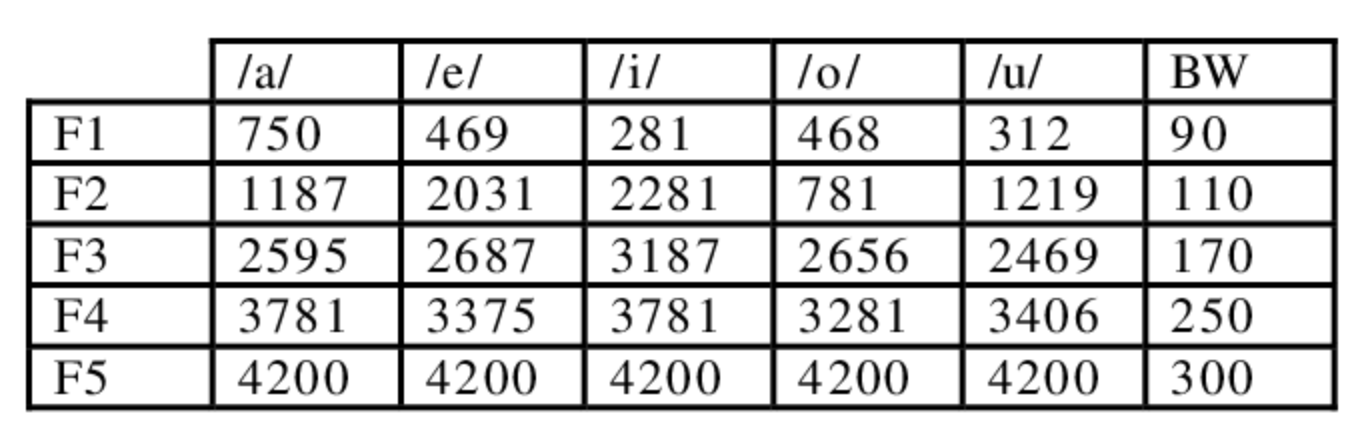

- Pulse train = Harmonics = Source

- BW(Band Width): Frequncy의 Band에 대해서 그 폭이 얼마나 되는가? 
  - 산맥이 얼마나 steep or flat한가?
  - BW $\uparrow$ -> Steepness $\downarrow$
  - Frquency $\uparrow$ -> BW $\uparrow$ -> Steepness $\downarrow$



In [ ]:
def hz2w(F, sr): #def로 함수 정의를 시작 / hz2w모양으로 hz2w의 변수를 F와 sr로 세팅해 준다. / sr은 sampling rate을 주로 뜻한다.
  NyFreq = sr/2; #NyFreq는 sampling rate의 1/2이다.
  w = F/NyFreq *np.pi; # w는 F/(sampling rate의 1/2) 을 π랑 곱합 것이다.
  return w # 이 부분이 출력이다.

def resonance (srate, F, BW): # BW는 band with 이다.
  a2 = np.exp(-hz2w(BW,srate)) #hz2w(BW/sampling rate의 1/2 을 파이랑 곱합 것)를 불러온다. a2 = e^(-Bw/0.5sr*π)
  omega = F*2*np.pi/srate #omega = F*2*π/sr
  a1 = -2*np.sqrt(a2)*np.cos(omega) #a1 = -2*[np.sqrt( e^(-Bw/0.5sr*π)) -> 각 항의 제곱근으로 변환 <4->2이런식으로>]*cos함수에(F*2*π/sr)을 대입한 결과
  a = np.array([1, a1, a2]) # -> a = (1, -2*√(e^(-Bw/0.5sr*π))*cos(F*2*π/sr), e^(-Bw/0.5sr*π))라는 벡터이다.
  b = np.array([sum(a)]) # -> 이러한 a의 값을 전부 더한 벡터이다. <1 + -2*√(e^(-Bw/0.5sr*π))*cos(F*2*π/srate) + e^(-Bw/0.5sr*π)>
  return a, b

$hz2w$의 출력 

$w = \frac{F}{0.5sr} * \pi$

---

$resonance$에서

$ a2 = e^{- \frac{BW}{0.5strate} * \pi}$

$ omega = \frac {F*2 \pi}{strate} $

$ a1 = -2 * \sqrt{e^{- \frac{BW}{0.5strate} * \pi}} * \cos(\frac {F*2 \pi}{strate}) $

$a = [1,-2 * \sqrt{e^{- \frac{BW}{0.5strate} * \pi}} * \cos(\frac {F*2 \pi}{strate}), e^{- \frac{BW}{0.5strate} * \pi}]$

$b = [1 + (-2) * \sqrt{e^{- \frac{BW}{0.5strate} * \pi}} * \cos(\frac {F*2 \pi}{strate}) + e^{- \frac{BW}{0.5strate} * \pi}]$


In [ ]:
s = s_all

In [ ]:
RG = 0  # RG is the frequency of the Glottal Resonator -> 0이라는 주파수에다가
BWG = 100  # BWG is the bandwidth of the Glottal Resonator -> 대역폭의 설정<peak의 길이> -> 하나의 peak를 만들어줌
# 가파를 수록 값이 작다.
a, b = resonance(sr,RG,BWG)
#resonance sr = sampling rate / RG -> 산맥의 위치(peak의 위치) / BWG -> 산맥이 얼마나 뾰족하냐 width(대역폭)가 크면 완만 width(대역폭)가 작으면 뾰족 -> 100정도변 완만 peak
s = lfilter(b, a, s, axis=0)
# s는 연속적으로 하기 위해서 계속 받아줘야한다. / 하나의 바퀴를 만들어주는 함수 # a = (1, -2*√(e^(-1/50*π))*cos(0*2*π/10000), e^(-1/50*π))라는 벡터 / b는 이러한 a를 전부 더 한 하나의 값으로 되어있는 벡터
ipd.Audio(s, rate=sr)

1
3


s = lfilter($[1 + (-2) * \sqrt{e^{- \frac{BWG}{0.5sr} * \pi}} * \cos(\frac {RG*2 \pi}{sr}) + e^{- \frac{BWG}{0.5sr} * \pi}], \ [1,-2 * \sqrt{e^{- \frac{BWG}{0.5sr} * \pi}} * \cos(\frac {RG*2 \pi}{sr}), e^{- \frac{BWG}{0.5sr} * \pi}], \  s = [amp * \sin(np.arange(1, sr * dur+1)/sr * 2 * \pi * freq) \ for \ freq \ in \ range(F0, int(sr/2)+1, F0), \ axis = 0$

)

**size 1의 b array(The numerator coefficient vector in a 1-D sequence)를 분자로 하고, size 3의 a array(The denominator coefficient vector in a 1-D sequence)를 분모로 하는 vector in 1-D sequnce가 size 5000의 s array(An N-dimensional input array)이라는 filter의 filtering을 통해 size 5000의 array가 출력된다.**

In [ ]:
print(s)
print(len(s))

[ 1.22464680e-16 -2.44929360e-16  2.14375088e-15 ...  9.15588412e-13
  5.73121084e-13 -2.42841177e-13]
5000


In [ ]:
RG = 500  # RG is the frequency of the Glottal Resonator
BWG = 60  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 1500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 2500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 3500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
s = lfilter(np.array([1, -1]), np.array([1]), s)
#입술 (공명의 상태를 만들어준다.
ipd.Audio(s, rate=sr)
# 결론적으로 /a/모음을 만들어 주었다. 

모음을 만드는 방법 


Phaser을 배우고 phasor들의 harmonics을 만들어주고 배음에 따라 점점 BW을 크게 만들어주고 그다음에 filering을 해주고 마지막으로 입술에서 증폭 상태를 만들어주었다. 

### lfilter(b, a, x, axis=-1, zi=None)

    Filter data along one-dimension with an IIR or FIR filter.
    
    Filter a data sequence, `x`, using a digital filter.  This works for many
    fundamental data types (including Object type).  The filter is a direct
    form II transposed implementation of the standard difference equation
    (see Notes).
    
    The function `sosfilt` (and filter design using ``output='sos'``) should be
    preferred over `lfilter` for most filtering tasks, as second-order sections
    have fewer numerical problems.
    
    Parameters
    ----------
- b : 행렬 The 분자 coefficient vector in a 일차원 벡터로 변환

- a :행렬 The 분모 coefficient vector in a 일차원 벡터로 변환 If a[0] is not 1, then both a and b are normalized by a[0].

- x : 행렬 An N-dimensional input array 다차원 벡터로 변환


위에서는 s의 행렬 -> 이 행렬은 f0일때 부터, f49일때 까지의 tmp 행렬이 전부 합친 행렬 / 1차원 벡터이다.
- axis : 정수, optional The axis of the input data array along which to apply the linear filter. -> 선형적으로 만든다 -> noise를 줄여준다. 

The filter is applied to each subarray along this axis. Default is -1.

- zi : 행렬, optional Initial conditions for the filter delays. It is a vector (or array of vectors for an N-dimensional input) of length max(len(a),
len(b)) - 1. If zi is None or is not given then initial rest is assumed. See lfiltic for more information.


결과 : 
- y : array The output of the digital filter

- zf : array, optional If zi is None, this is not returned, otherwise, zf holds the final filter delay values. -위에서는 값이 없다

    The filter function is implemented as a direct II transposed structure.
    This means that the filter implements::
    
       a[0]*y[n] = b[0]*x[n] + b[1]*x[n-1] + ... + b[M]*x[n-M]
                             - a[1]*y[n-1] - ... - a[N]*y[n-N]
    
    where `M` is the degree of the numerator, `N` is the degree of the
    denominator, and `n` is the sample number.  It is implemented using
    the following difference equations (assuming M = N)::
    
         a[0]*y[n] = b[0] * x[n]               + d[0][n-1]
           d[0][n] = b[1] * x[n] - a[1] * y[n] + d[1][n-1]
           d[1][n] = b[2] * x[n] - a[2] * y[n] + d[2][n-1]
         ...
         d[N-2][n] = b[N-1]*x[n] - a[N-1]*y[n] + d[N-1][n-1]
         d[N-1][n] = b[N] * x[n] - a[N] * y[n]
    
    where `d` are the state variables.
    
    The rational transfer function describing this filter in the
    z-transform domain is::
    
                             -1              -M
                 b[0] + b[1]z  + ... + b[M] z
         Y(z) = -------------------------------- X(z)
                             -1              -N
                 a[0] + a[1]z  + ... + a[N] z
    
    
a[0]y[n] = b[0] x[n] + d[0][n-1] d[0][n] = b[1] x[n] - a[1] y[n] + d[1][n-1] d[1][n] = b[2] x[n] - a[2] y[n] + d[2][n-1] ... d[N-2][n] = b[N-1]x[n] -
a[N-1]y[n] + d[N-1][n-1] d[N-1][n] = b[N] x[n] - a[N] y[n]
s[0] = s[1] ...

    Examples
    --------
    Generate a noisy signal to be filtered:
    
    >>> from scipy import signal
    >>> import matplotlib.pyplot as plt
    >>> t = np.linspace(-1, 1, 201)
    >>> x = (np.sin(2*np.pi*0.75*t*(1-t) + 2.1) +
    ...      0.1*np.sin(2*np.pi*1.25*t + 1) +
    ...      0.18*np.cos(2*np.pi*3.85*t))
    >>> xn = x + np.random.randn(len(t)) * 0.08
    
    Create an order 3 lowpass butterworth filter:
    
    >>> b, a = signal.butter(3, 0.05)
    
    Apply the filter to xn.  Use lfilter_zi to choose the initial condition of
    the filter:
    
    >>> zi = signal.lfilter_zi(b, a)
    >>> z, _ = signal.lfilter(b, a, xn, zi=zi*xn[0])
    
    Apply the filter again, to have a result filtered at an order the same as
    filtfilt:
    
    >>> z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
    
    Use filtfilt to apply the filter:
    
    >>> y = signal.filtfilt(b, a, xn)
    
    Plot the original signal and the various filtered versions:
    
    >>> plt.figure
    >>> plt.plot(t, xn, 'b', alpha=0.75)
    >>> plt.plot(t, z, 'r--', t, z2, 'r', t, y, 'k')
    >>> plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice',
    ...             'filtfilt'), loc='best')
    >>> plt.grid(True)
    >>> plt.show()


# load wav

In [ ]:
from scipy.io import wavfile
# sr, s = wavfile.read('a.wav')
nSamp = len(s)
dur = nSamp / sr
t = np.linspace(1/sr, dur, nSamp)

# Fourier tranform

In [ ]:
nFFT = nSamp
amp = [];
for n in range(0,nFFT):
    omega = 2*np.pi*n/nFFT # angular velocity
    z = np.exp(omega*1j)**(np.arange(0,nSamp))
    amp.append(np.abs(np.dot(s,z)))

Text(0, 0.5, 'amplitude')

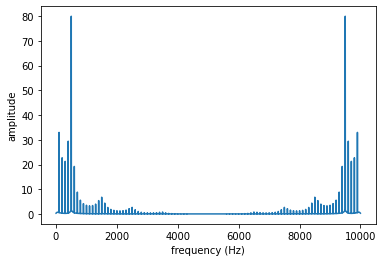

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
freq = np.arange(1,nFFT+1)*sr/nFFT;
ax.plot(freq, amp)
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('amplitude')

# define helper functions

In [ ]:
def frame_signal(signal, srate, win_size, win_step):
    frame_size = int(win_size * srate)
    frame_step = int(win_step * srate)

    # Get number of frames
    num_frames = int(np.ceil(np.abs(len(signal) - frame_size) / frame_step))
    # Pad signal
    pad_len = num_frames * frame_step + frame_size
    pad = np.zeros((pad_len - len(signal)))
    signal_padded = np.append(signal, pad)
    # Get within-frame sample indices
    idx1 = np.tile(np.arange(0, frame_size), (num_frames, 1))
    # Get vectors of frame_step increments
    idx2 = np.tile(np.arange(0, num_frames * frame_step, frame_step),
                   (frame_size, 1)).T
    # Get total indices divided by each frame
    indices = idx1 + idx2
    # Get frames divided by each frame based on indices
    frames = signal_padded[indices.astype(np.int32, copy=False)]
#     if cutoff is not None:
#         cutoff_bin = round(cutoff * nfft / (srate))  # hz -> bin
#         frames = frames[:, :cutoff_bin]
    return frames

def get_window(win_size, srate, win_type, win_samp=None):
    '''Get window samples for win_size'''
    if win_samp is None:
        win_samp = int(win_size * srate)  # sec -> sample

    if win_type == 'rect':
        return np.kaiser(win_samp, 0)
    elif win_type == 'hamming':
        return np.hamming(win_samp)
    elif win_type == 'hanning':
        return np.hanning(win_samp)
    elif win_type == 'kaiser':
        return np.kaiser(win_samp, 14)
    elif win_type == 'blackman':
        return np.blackman(win_samp)

def plot_spectrogram(S):
    fig, ax = plt.subplots(facecolor='white', figsize=(14, 6))
    im = ax.imshow(S.T, aspect='auto', origin='lower', cmap=plt.get_cmap('Greys'))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax)
    return fig, ax

def preemphasis(s, pre_emp=0.97):
    # Emphasize high frequency range of the waveform by increasing power(squared amplitude).
    s = lfilter([1, -pre_emp], [1], s)
    return s

# preprocessing signal

In [ ]:
max_freq = None  # cutoff freq
win_size = 0.008 # sec
win_step = 0.001  # sec
win_type = 'hanning' # options: 'rect', 'hamming', 'hanning', 'kaiser', 'blackman'
nfft = 1024

# Emphasize signal
s = preemphasis(s)
# Frame signal
frames = frame_signal(s, sr, win_size, win_step)
# Apply window function
frames *= get_window(win_size, sr, win_type)
print('frames:', frames.shape)

frames: (492, 80)


(<Figure size 1008x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c2140e358>)

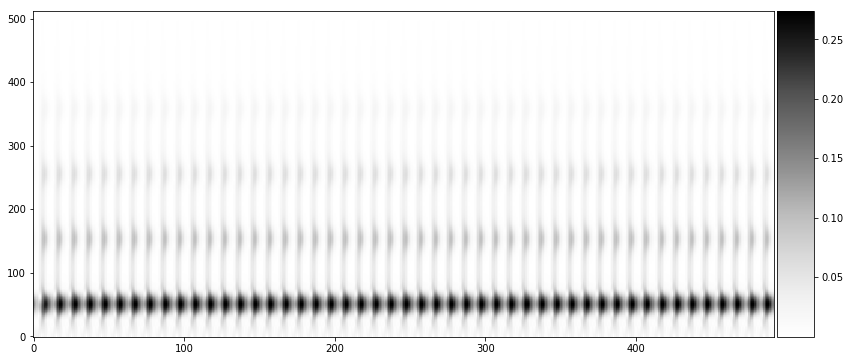

In [ ]:
magspec = np.abs(np.fft.rfft(frames, n=nfft)) # frames x (nfft//2 + 1)
plot_spectrogram(magspec)

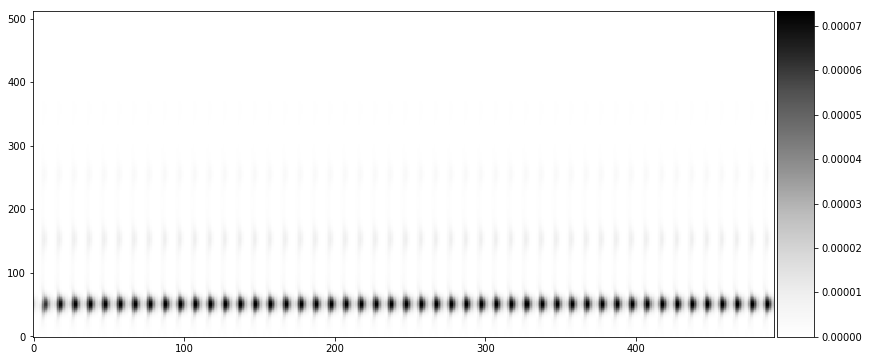

In [ ]:
powspec = 1/nfft * (magspec**2)
plot_spectrogram(powspec);

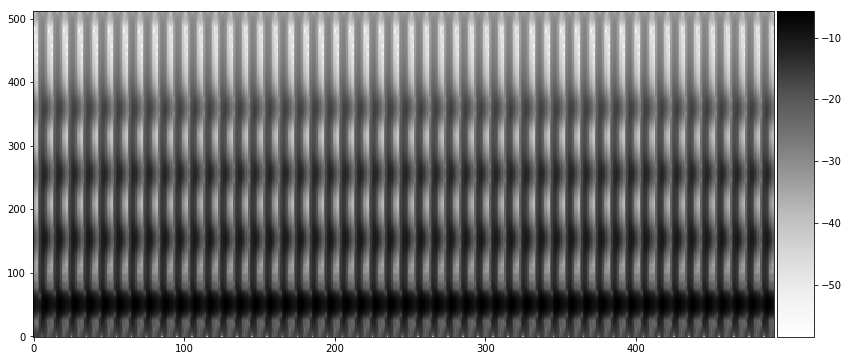

In [ ]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);

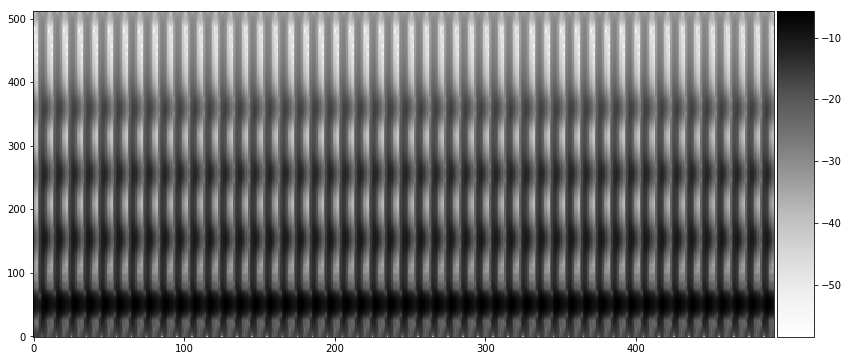

In [ ]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);